# Visualize features extracted by convolutional layers

One main advantage of using CNNs is that you can visualize the features that are extracted by convolutional layers.

Convolutional layers extract local features from an image, such as edges, corners, etc.

These can be visualized using the `plt.imshow()` function of the Matplotlib library. If you use the `'binary'` colormap, darker pixels show the parts of the picture that receive a higher "score" by the network. 

You can think of darker parts as the most relevant for the final model's prediction.

In [19]:
import numpy as np
import matplotlib.pyplot as plt

import torch

import torch.nn as nn
import torch.nn.functional as F

from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor

In [20]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [21]:
class SimpleCNN(nn.Module):
    def __init__(self, n_classes=10):
        super(SimpleCNN, self).__init__()
        self.n_classes = n_classes
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)  # non parametric
        self.fc1 = nn.Linear(32 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, self.n_classes)

    def forward(self, x):
        x = F.relu(self.conv1(x)) 
        x = self.pool(x)
        x = F.relu(self.conv2(x)) 
        x = self.pool(x)  
        x = x.view(-1, 32 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [22]:
model = SimpleCNN(n_classes=10).to(device)
print(model)

SimpleCNN(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1568, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


In [23]:
datapath = 'data'

# load dataset
data_train = MNIST(
    root = datapath,
    train = True,                         
    transform = ToTensor(), 
)
data_test = MNIST(
    root = datapath, 
    train = False, 
    transform = ToTensor(),
)

In [24]:
class SimpleCNN(nn.Module):
    def __init__(self, n_classes=10):
        super(SimpleCNN, self).__init__()
        self.n_classes = n_classes
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)  # non parametric
        self.fc1 = nn.Linear(32 * 7 * 7, 32)
        self.fc2 = nn.Linear(32, self.n_classes)

    def forward(self, x):
        x = F.relu(self.conv1(x))  # 28x28 --> 28x28
        x = self.pool(x)  # 28x28 --> ?x?
        x = F.relu(self.conv2(x)) # ?x? --> ?x?
        x = self.pool(x)  # ?x? --> 7x7
        x = x.view(-1, 32 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [25]:
model = SimpleCNN(n_classes=10).to(device)
print(model)

SimpleCNN(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1568, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=10, bias=True)
)


In [26]:
loaded_state_dict = torch.load("saved_models/CNN.pt")
model.load_state_dict(loaded_state_dict)

<All keys matched successfully>

In [27]:
x, y = data_test[0]
x = x.to(device)
x = x.view(1, 1, 28, 28)

out_conv1 = model.conv1(x)
out_relu1 = F.relu(out_conv1)
out_pool1 = model.pool(out_relu1)
out_conv2 = model.conv2(out_pool1)
out_relu2 = F.relu(out_conv2)
out_pool2 = model.pool(out_relu2)

In [28]:
# move all tensors to CPU, detach them from the computational graph,
# convert them to numpy arrays, and remove the first dimension
x = x.cpu().detach().numpy()
x = x[0, 0, :, :]

out_conv1 = out_conv1.cpu().detach().numpy()
out_conv2 = out_conv2.cpu().detach().numpy()
out_relu1 = out_relu1.cpu().detach().numpy()
out_relu2 = out_relu2.cpu().detach().numpy()
out_pool1 = out_pool1.cpu().detach().numpy()
out_pool2 = out_pool2.cpu().detach().numpy()

out_conv1 = out_conv1[0, :, : ,:]
out_relu1 = out_relu1[0, :, : ,:]
out_pool1 = out_pool1[0, :, : ,:]
out_conv2 = out_conv2[0, :, : ,:]
out_relu2 = out_relu2[0, :, : ,:]
out_pool2 = out_pool2[0, :, : ,:]

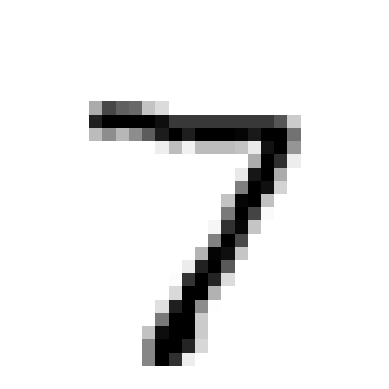

In [29]:
plt.figure()
plt.imshow(x, cmap='binary')
plt.axis('off')
plt.show()

In [30]:
def plot_layer(out_features, features_per_row=8):
    n_rows = len(out_features) // features_per_row
    n_tot = int(n_rows*features_per_row)
    out_features = out_features[:n_tot]
    fig = plt.figure(figsize=(features_per_row, n_rows))
    for i, out in enumerate(out_features):
        a = fig.add_subplot(n_rows, features_per_row, i+1)
        imgplot = plt.imshow(out, cmap='binary')
        a.axis("off")

plt.show()

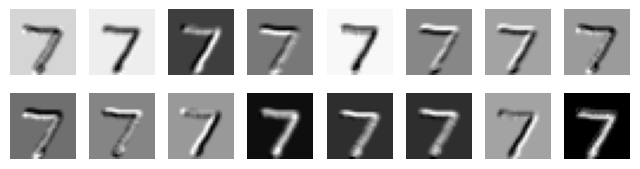

In [31]:
plot_layer(out_conv1, features_per_row=8)

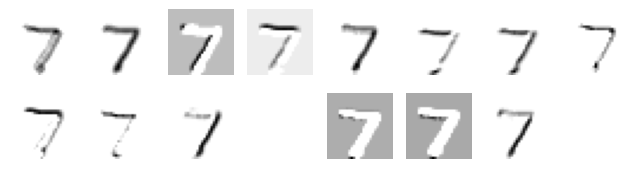

In [32]:
plot_layer(out_relu1, features_per_row=8)

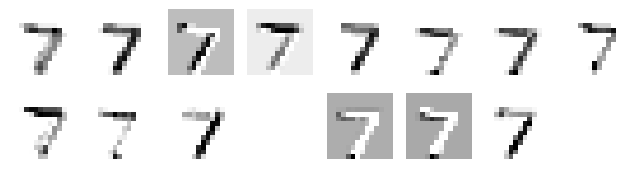

In [33]:
plot_layer(out_pool1, features_per_row=8)

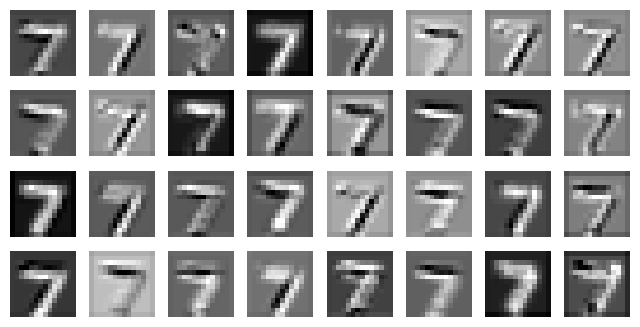

In [34]:
plot_layer(out_conv2, features_per_row=8)

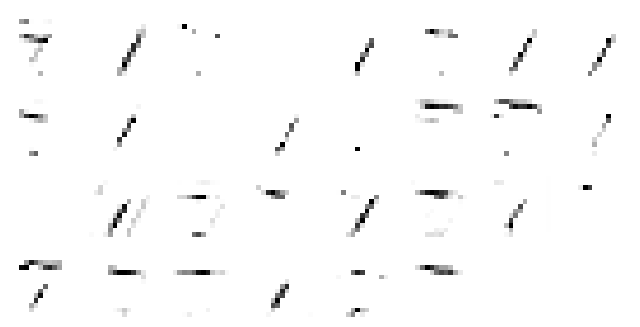

In [35]:
plot_layer(out_relu2, features_per_row=8)

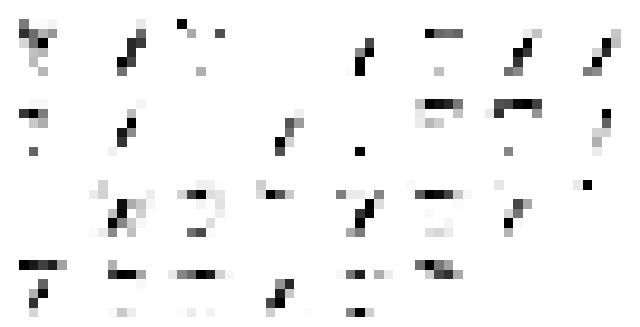

In [36]:
plot_layer(out_pool2, features_per_row=8)